# Análisis documentos UY

## Preparación

In [1]:
with open("procesado/UY_FA.txt", "r") as f:
    fa_base = f.read()

print(fa_base)

NUEVOS SUEÑOS EMPIEZAN HOY Hemos recorrido un largo camino de la mano de nuestros sueños, hecho de lucha contra el fascismo,  acercando una tras otra a las nuevas generaciones, vislumbrando siempre una luz a lo lejos. Hemos con fluido a lo largo de los años desde distintas vertientes y sensibilidades, con la certeza de que sólo juntos  podíamos convertirnos en una fuerza transformadora, capaz de contribuir a crear una sociedad solidaria,  de iguales, de plena libertad y democracia y alcanzar entre todos y todas las más altas metas. Llegó luego  el tiempo de la construcción, de la concreción de los sueños, de medirnos con la realidad. Recorrimos un  prodigioso camino de acumulación de fuerzas y voluntades que nos permitió alcanzar tres veces el gobi erno nacional y ser gobierno departamental en numerosas oportunidades. El Uruguay es hoy otro país. Quedan aún viejos sueños por cumplirse, es verdad y es importante recordarlo. Pero se han ido sumando  y cobrando fuerza los sueños de hoy. E

In [2]:
with open("procesado/UY_PN.txt", "r") as f:
    pn_base = f.read()

print(pn_base)

Un Uruguay mejor es posible, y para construirlo hace falta cambiar al partido de  gobierno. Tras quince años de condiciones muy favorables y mayorías parlamentarias propias,  el Frente Amplio ha sido incapaz de resolver los problemas que más golpean a los uruguayos. La economía ha dejado de crecer; en los últimos cuatro años desaparecieron unos 50.000 puestos de trabajo; el clima de convivencia se deteriora a causa de la inseguridad; la crisis educativa perdura; aumenta el número de personas que viven en asentamientos; tenemos el déficit fiscal más alto de los últimos treinta años y un crecimiento de la deuda que se ha vuelto insostenible. Hacemos política porque tenemos sueños. Queremos participar en la construcción  de un país mejor. No pretendemos gobernar para los nuestros sino para todos los uruguayos. Queremos que el país evolucione y queremos seguir evolucionando todos hacia un auténtico desarrollo humano. Para asumir esta tarea nos venimos preparando desde hace años. Hemos reco

In [3]:
with open ("procesado/UY_PC.txt", "r") as f:
    pc_base = f.read()

print(pc_base)

6 1 Esta cifra excluye las transferencias de las AFAP al Fideicomiso de la Seguridad Social en el marco de la ley referente a los cincuentones. 2 Article IV 2018, FMIHacia una política fiscal responsable Durante la década de bonanza económica (2004-2013) los ingresos fiscales crecieron signi  ficativamente por encima de su tendencia histórica y los gastos fiscales lo hicieron aún más. Pero cuando vino el enfriamiento económico y los ingresos fiscales se resintieron, los gastos fiscales siguieron creciendo y no se acompasaron a la nueva realidad económica. Ante el creciente déficit fiscal el gobierno impuso tres ajustes: ›Recortó las inversiones de las empresas públicas a la mitad. ›Estableció aumentos de las tarifas públicas por encima de los costos de producción. ›Aumentó el IRAE a través de una modificación de su forma de cómputo, y aumentó el IRPF y el IASS para las franjas de ingresos más altas. Hecho todo esto, el déficit fiscal es aún mayor que antes del primer ajuste en 2014, y 

In [8]:
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

In [5]:
fa_frases = re.split(pattern=r"\.\s*", string=fa_base)
len(fa_frases)

3725

In [6]:
pn_frases = re.split(pattern=r"\.\s", string=pn_base)
print(pn_frases)

['Un Uruguay mejor es posible, y para construirlo hace falta cambiar al partido de  gobierno', 'Tras quince años de condiciones muy favorables y mayorías parlamentarias propias,  el Frente Amplio ha sido incapaz de resolver los problemas que más golpean a los uruguayos', 'La economía ha dejado de crecer; en los últimos cuatro años desaparecieron unos 50.000 puestos de trabajo; el clima de convivencia se deteriora a causa de la inseguridad; la crisis educativa perdura; aumenta el número de personas que viven en asentamientos; tenemos el déficit fiscal más alto de los últimos treinta años y un crecimiento de la deuda que se ha vuelto insostenible', 'Hacemos política porque tenemos sueños', 'Queremos participar en la construcción  de un país mejor', 'No pretendemos gobernar para los nuestros sino para todos los uruguayos', 'Queremos que el país evolucione y queremos seguir evolucionando todos hacia un auténtico desarrollo humano', 'Para asumir esta tarea nos venimos preparando desde hace 

In [7]:
pc_frases = re.split(pattern=r"\.\s", string=pc_base)
print(pc_frases)

['6 1 Esta cifra excluye las transferencias de las AFAP al Fideicomiso de la Seguridad Social en el marco de la ley referente a los cincuentones', '2 Article IV 2018, FMIHacia una política fiscal responsable Durante la década de bonanza económica (2004-2013) los ingresos fiscales crecieron signi  ficativamente por encima de su tendencia histórica y los gastos fiscales lo hicieron aún más', 'Pero cuando vino el enfriamiento económico y los ingresos fiscales se resintieron, los gastos fiscales siguieron creciendo y no se acompasaron a la nueva realidad económica', 'Ante el creciente déficit fiscal el gobierno impuso tres ajustes: ›Recortó las inversiones de las empresas públicas a la mitad', '›Estableció aumentos de las tarifas públicas por encima de los costos de producción', '›Aumentó el IRAE a través de una modificación de su forma de cómputo, y aumentó el IRPF y el IASS para las franjas de ingresos más altas', 'Hecho todo esto, el déficit fiscal es aún mayor que antes del primer ajus

## Sentiment analysis

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

/home/Benjamin/Escritorio/TIF/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-22 13:42:12.143622: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 13:42:12.271203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 13:42:12.325368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 13:4

In [10]:
tokenizer = AutoTokenizer.from_pretrained("MMG/xlm-roberta-base-sa-spanish")

model = AutoModelForSequenceClassification.from_pretrained("MMG/xlm-roberta-base-sa-spanish")

pipe = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/home/Benjamin/Escritorio/TIF/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### FA

In [19]:
fa_sa = pipe(fa_frases)

KeyboardInterrupt: 

In [22]:
print(fa_sa)

[{'label': 'Positive', 'score': 0.732757568359375}, {'label': 'Positive', 'score': 0.7050518989562988}, {'label': 'Neutral', 'score': 0.3950539827346802}, {'label': 'Positive', 'score': 0.6890724301338196}, {'label': 'Neutral', 'score': 0.4941871762275696}, {'label': 'Positive', 'score': 0.8209825754165649}, {'label': 'Positive', 'score': 0.7390749454498291}, {'label': 'Neutral', 'score': 0.40049606561660767}, {'label': 'Positive', 'score': 0.6518595218658447}, {'label': 'Neutral', 'score': 0.40773889422416687}, {'label': 'Neutral', 'score': 0.44227495789527893}, {'label': 'Negative', 'score': 0.45724567770957947}, {'label': 'Neutral', 'score': 0.3560352027416229}, {'label': 'Positive', 'score': 0.4910247027873993}, {'label': 'Positive', 'score': 0.4075387418270111}, {'label': 'Positive', 'score': 0.5894103050231934}, {'label': 'Positive', 'score': 0.44639554619789124}, {'label': 'Positive', 'score': 0.39153558015823364}, {'label': 'Positive', 'score': 0.3722878694534302}, {'label': 'N

In [24]:
labels = []
scores = []

for i in fa_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_fa_sa = pd.DataFrame({'Frase':fa_frases, 'Etiqueta':labels, 'Puntuación':scores})

In [25]:
df_fa_sa

,Frase,Etiqueta,Puntuación
0,NUEVOS SUEÑOS EMPIEZAN HOY Hemos recorrido un ...,Positive,0.732758
1,Hemos con fluido a lo largo de los años desde ...,Positive,0.705052
2,"Llegó luego el tiempo de la construcción, de ...",Neutral,0.395054
3,Recorrimos un prodigioso camino de acumulació...,Positive,0.689072
4,El Uruguay es hoy otro país,Neutral,0.494187
...,...,...,...
3720,Se impulsará la reforma del Servicio de Retiro...,Neutral,0.459808
3721,PROPUESTAS A MEDIANO Y LARGO PLAZO En nuestra ...,Neutral,0.551162
3722,A este objetivo coadyu van la diplomacia preve...,Negative,0.506498
3723,"” Es decir, que el costo político y militar le...",Negative,0.826174


In [34]:
df_fa_sa.to_csv("salidas/sentiment_analysis_fa.csv", index=False)

In [49]:
df_fa_sa = pd.read_csv("salidas/sentiment_analysis_fa.csv")

### P. Nacional

In [30]:
pn_sa = pipe(pn_frases)

In [31]:
print(pn_sa)

[{'label': 'Neutral', 'score': 0.33827587962150574}, {'label': 'Negative', 'score': 0.7669742107391357}, {'label': 'Negative', 'score': 0.7879459261894226}, {'label': 'Positive', 'score': 0.4675481617450714}, {'label': 'Positive', 'score': 0.535724937915802}, {'label': 'Negative', 'score': 0.49277493357658386}, {'label': 'Positive', 'score': 0.7803722023963928}, {'label': 'Neutral', 'score': 0.48618006706237793}, {'label': 'Neutral', 'score': 0.46035635471343994}, {'label': 'Positive', 'score': 0.48736709356307983}, {'label': 'Positive', 'score': 0.6697237491607666}, {'label': 'Positive', 'score': 0.6772210001945496}, {'label': 'Negative', 'score': 0.45403623580932617}, {'label': 'Neutral', 'score': 0.4865860342979431}, {'label': 'Neutral', 'score': 0.40026071667671204}, {'label': 'Positive', 'score': 0.48865923285484314}, {'label': 'Positive', 'score': 0.3411872982978821}, {'label': 'Negative', 'score': 0.39087918400764465}, {'label': 'Negative', 'score': 0.8243831396102905}, {'label'

In [32]:
labels = []
scores = []

for i in pn_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_pn_sa = pd.DataFrame({'Frase':pn_frases, 'Etiqueta':labels, 'Puntuación':scores})

In [33]:
df_pn_sa

,Frase,Etiqueta,Puntuación
0,"Un Uruguay mejor es posible, y para construirl...",Neutral,0.338276
1,Tras quince años de condiciones muy favorables...,Negative,0.766974
2,La economía ha dejado de crecer; en los último...,Negative,0.787946
3,Hacemos política porque tenemos sueños,Positive,0.467548
4,Queremos participar en la construcción de un ...,Positive,0.535725
...,...,...,...
4184,Para eso se utilizará el siste- ma de comunica...,Neutral,0.659669
4185,Otra parte de la estrategia consistirá en serv...,Negative,0.599387
4186,Existen buenas prácticas a nivel internacional...,Positive,0.663300
4187,"La experiencia muestra, por ejemplo, los efect...",Positive,0.460089


In [35]:
df_pn_sa.to_csv("salidas/sentiment_analysis_pn.csv", index=False)

In [21]:
df_pn_sa = pd.read_csv("salidas/sentiment_analysis_pn.csv")

### P. Colorado

In [11]:
pc_sa = pipe(pc_frases)

In [12]:
pc_sa

[{'label': 'Negative', 'score': 0.4686855375766754},
 {'label': 'Positive', 'score': 0.3974173665046692},
 {'label': 'Negative', 'score': 0.8294655084609985},
 {'label': 'Negative', 'score': 0.6307072043418884},
 {'label': 'Negative', 'score': 0.47119805216789246},
 {'label': 'Neutral', 'score': 0.5108609795570374},
 {'label': 'Negative', 'score': 0.47767433524131775},
 {'label': 'Negative', 'score': 0.7577372789382935},
 {'label': 'Neutral', 'score': 0.4932444393634796},
 {'label': 'Negative', 'score': 0.7429456114768982},
 {'label': 'Negative', 'score': 0.769137978553772},
 {'label': 'Negative', 'score': 0.8589934706687927},
 {'label': 'Negative', 'score': 0.5485475659370422},
 {'label': 'Negative', 'score': 0.8148829340934753},
 {'label': 'Negative', 'score': 0.5106704235076904},
 {'label': 'Neutral', 'score': 0.411251962184906},
 {'label': 'Neutral', 'score': 0.5720887780189514},
 {'label': 'Neutral', 'score': 0.5883374214172363},
 {'label': 'Neutral', 'score': 0.5929784178733826},

In [14]:
labels = []
scores = []

for i in pc_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_pc_sa = pd.DataFrame({"Frase":pc_frases, "Etiqueta":labels, "Puntuación":scores})

In [15]:
df_pc_sa

,Frase,Etiqueta,Puntuación
0,6 1 Esta cifra excluye las transferencias de l...,Negative,0.468686
1,"2 Article IV 2018, FMIHacia una política fisca...",Positive,0.397417
2,Pero cuando vino el enfriamiento económico y l...,Negative,0.829466
3,Ante el creciente déficit fiscal el gobierno i...,Negative,0.630707
4,›Estableció aumentos de las tarifas públicas p...,Negative,0.471198
...,...,...,...
3711,Existen grupos de personas que han sido histór...,Negative,0.790327
3712,Consideramos fundamental garantizar el pleno e...,Negative,0.413060
3713,“La Marcha del Silencio nos recuerda que hay q...,Negative,0.799415
3714,La responsabilidad del Estado no se extinguirá...,Neutral,0.526446


In [16]:
df_pc_sa.to_csv("salidas/sentiment_analysis_pc.csv", index=False)

In [22]:
df_pc_sa = pd.read_csv("salidas/sentiment_analysis_pc.csv")

### Comparando resultados

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

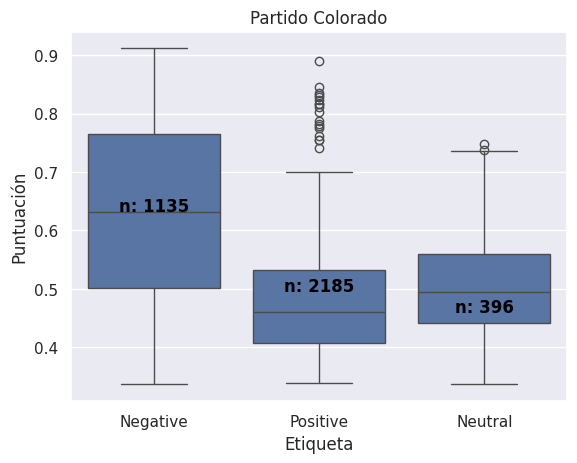

In [36]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_pc_sa['Etiqueta'], y=df_pc_sa['Puntuación'])

medians = df_pc_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_pc_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title("Partido Colorado")
plt.show()

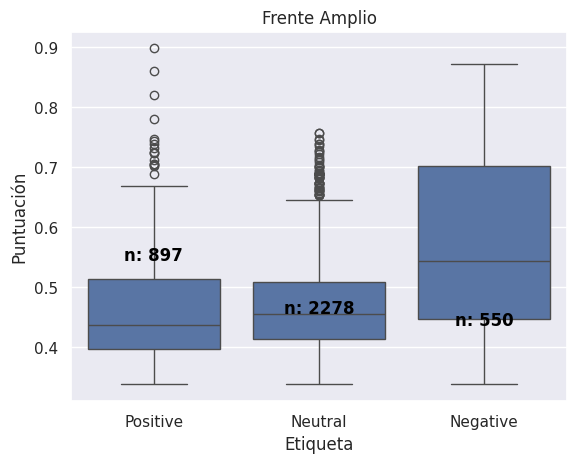

In [37]:
sns.set_theme(style="darkgrid")

ax = sns.boxplot(x = df_fa_sa["Etiqueta"], y = df_fa_sa['Puntuación'])

medians = df_fa_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_fa_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')


plt.title('Frente Amplio')
plt.show()

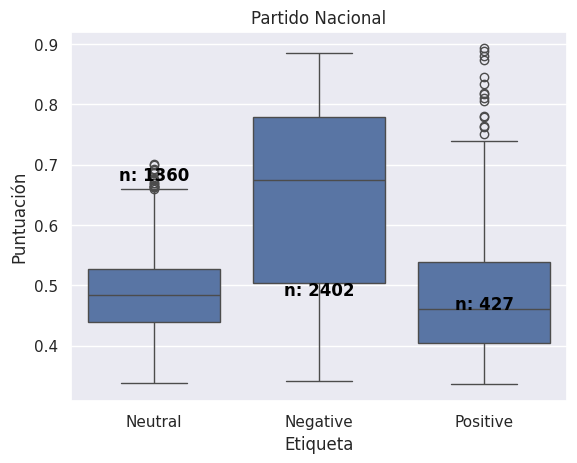

In [39]:
sns.set_theme(style="darkgrid")

ax = sns.boxplot(x = df_pn_sa["Etiqueta"], y = df_pn_sa['Puntuación'])

medians = df_pn_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_pn_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')


plt.title('Partido Nacional')
plt.show()

In [52]:
df_fa_sa.shape[0]

3725

In [56]:
#partidos = ['Frente Amplio', 'Partido Nacional', 'Partido Colorado']

df_fa_sa['Partido'] = np.repeat('Frente Amplio', df_fa_sa.shape[0])
df_pn_sa['Partido'] = np.repeat('Partido Nacional', df_pn_sa.shape[0])
df_pc_sa['Partido'] = np.repeat('Partido Colorado', df_pc_sa.shape[0])

part_uy = pd.concat([df_pc_sa, df_fa_sa, df_pn_sa])

In [64]:
n_etiq = part_uy.groupby(['Partido', 'Etiqueta']).count().reset_index()

In [65]:
n_etiq

,Partido,Etiqueta,Frase,Puntuación
0,Frente Amplio,Negative,897,897
1,Frente Amplio,Neutral,2278,2278
2,Frente Amplio,Positive,550,550
3,Partido Colorado,Negative,1135,1135
4,Partido Colorado,Neutral,2185,2185
5,Partido Colorado,Positive,396,396
6,Partido Nacional,Negative,1359,1360
7,Partido Nacional,Neutral,2402,2402
8,Partido Nacional,Positive,427,427


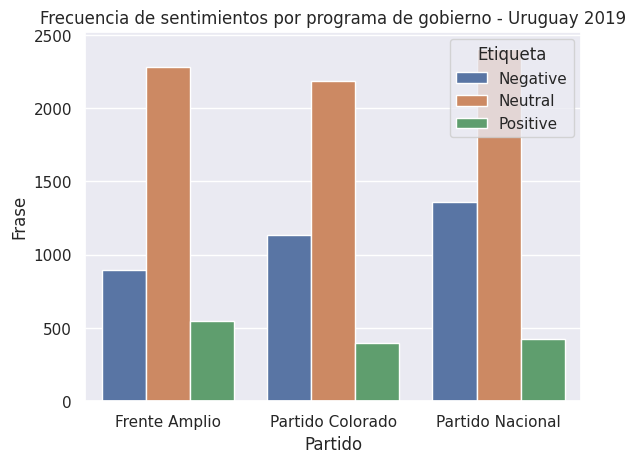

In [73]:
sns.barplot(x = n_etiq['Partido'], y = n_etiq['Frase'], hue=n_etiq['Etiqueta'])
plt.title("Frecuencia de sentimientos por programa de gobierno - Uruguay 2019")
plt.show()

## LDA

In [9]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [10]:
stop_words = set(stopwords.words('spanish'))

def tokenizar(texto):
    tokenizado = word_tokenize(texto.lower())
    pal_filtradas = [word for word in tokenizado if word.isalnum() and word not in stop_words]
    text_filtrado = ' '.join(pal_filtradas)
    return text_filtrado

In [11]:
sw_2 = []

for i in stop_words:
    sw_2.append(i)

In [12]:
fa_tok = tokenizar(fa_base)
pn_tok = tokenizar(pn_base)
pc_tok = tokenizar(pc_base)

### FA

In [13]:
vect_1 = CountVectorizer(stop_words=sw_2)
X1 = vect_1.fit_transform(fa_tok.split(" "))

In [14]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X1)

LatentDirichletAllocation(random_state=42)

In [15]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_1.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['diferentes', 'niños', 'situación', 'uso', 'sectores', 'promoción', 'cuidados', 'territorio', 'todas', 'vida']
Tema 1:
['empresas', 'amplio', 'defensa', 'avanzar', 'integración', 'marco', 'fortalecer', 'ser', 'través', 'recursos']
Tema 2:
['empleo', 'mujeres', 'cultura', 'procesos', 'ello', 'mayor', 'gestión', 'nivel', 'sociedad', 'desarrollo']
Tema 3:
['igualdad', 'expediente', 'tiempo', 'vivienda', 'años', 'protección', 'deben', 'uruguay', 'nuevas', 'personas']
Tema 4:
['investigación', 'espacios', 'sector', 'parte', 'género', 'formación', 'así', 'sistema', 'país', 'nacional']
Tema 5:
['niveles', 'seguridad', 'objetivos', 'forma', 'promover', 'población', 'calidad', 'servicios', 'social', 'políticas']
Tema 6:
['jóvenes', 'creación', 'gobiernos', 'desarrollar', 'necesario', 'pública', 'sociales', 'debe', 'derechos', 'educación']
Tema 7:
['construcción', 'programas', 'cada', 'materia', 'deberá', 'acciones', 'profundizar', 'participación', 'salud', 'política']
Tema 8:
['objetiv

In [16]:
words = vect_1.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [17]:
df_topics = df_topics.reset_index()

In [19]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,vida
1,Tópico 2,Palabra 1,recursos
2,Tópico 3,Palabra 1,desarrollo
3,Tópico 4,Palabra 1,personas
4,Tópico 5,Palabra 1,nacional
...,...,...,...
95,Tópico 6,Palabra 10,niveles
96,Tópico 7,Palabra 10,jóvenes
97,Tópico 8,Palabra 10,construcción
98,Tópico 9,Palabra 10,objetivo


In [20]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,142.1
1,Tópico 2,Peso 1,201.1
2,Tópico 3,Peso 1,463.1
3,Tópico 4,Peso 1,240.1
4,Tópico 5,Peso 1,415.1
...,...,...,...
95,Tópico 6,Peso 10,113.1
96,Tópico 7,Peso 10,77.1
97,Tópico 8,Peso 10,85.1
98,Tópico 9,Peso 10,84.1


In [21]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,vida,142.1
1,Tópico 2,Palabra 1,recursos,201.1
2,Tópico 3,Palabra 1,desarrollo,463.1
3,Tópico 4,Palabra 1,personas,240.1
4,Tópico 5,Palabra 1,nacional,415.1
...,...,...,...,...
95,Tópico 6,Palabra 10,niveles,113.1
96,Tópico 7,Palabra 10,jóvenes,77.1
97,Tópico 8,Palabra 10,construcción,85.1
98,Tópico 9,Palabra 10,objetivo,84.1


In [22]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,vida,142.1,980.0,14.500000
1,Tópico 2,Palabra 1,recursos,201.1,1311.0,15.339436
2,Tópico 3,Palabra 1,desarrollo,463.1,1553.0,29.819704
3,Tópico 4,Palabra 1,personas,240.1,1078.0,22.272727
4,Tópico 5,Palabra 1,nacional,415.1,1853.0,22.401511
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,niveles,113.1,2050.0,5.517073
96,Tópico 7,Palabra 10,jóvenes,77.1,1493.0,5.164099
97,Tópico 8,Palabra 10,construcción,85.1,1447.0,5.881133
98,Tópico 9,Palabra 10,objetivo,84.1,1475.0,5.701695


In [24]:
full_merged.to_csv("salidas/lda_FA_UY.csv", index=False)

### PN

In [25]:
vect_2 = CountVectorizer(stop_words=sw_2)
X2 = vect_2.fit_transform(pn_tok.split(" "))

In [26]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X2)

LatentDirichletAllocation(random_state=42)

In [27]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_2.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['proceso', 'evaluación', 'internacional', 'falta', 'transporte', 'ejemplo', 'forma', 'social', 'impulsar', 'desarrollo']
Tema 1:
['jóvenes', 'públicos', 'generar', 'departamentales', 'apoyo', 'hacia', 'información', 'gestión', 'ley', 'ser']
Tema 2:
['atención', 'fortalecer', 'público', 'año', 'nuevas', 'si', 'personal', 'sino', 'sector', 'debe']
Tema 3:
['problema', 'objetivo', 'dirección', 'fin', 'costos', 'conjunto', 'educación', 'hoy', 'coordinación', 'cada']
Tema 4:
['todas', 'salud', 'diferentes', 'pública', 'uso', 'medidas', 'uruguay', 'seguridad', 'años', 'nacional']
Tema 5:
['gobierno', 'calidad', 'gobiernos', 'manera', 'plan', 'públicas', 'empresas', 'parte', 'recursos', 'país']
Tema 6:
['materia', 'problemas', 'creación', 'ministerio', 'sociedad', 'servicios', 'así', 'tiempo', 'programa', 'política']
Tema 7:
['últimos', 'economía', 'sido', 'internacionales', 'experiencia', 'importante', 'capacidad', 'programas', 'personas', 'sistema']
Tema 8:
['sólo', 'vida', 'hace',

In [28]:
words = vect_2.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [29]:
df_topics

,Palabra 1,Palabra 2,Palabra 3,Palabra 4,Palabra 5,Palabra 6,Palabra 7,Palabra 8,Palabra 9,Palabra 10,Peso 1,Peso 2,Peso 3,Peso 4,Peso 5,Peso 6,Peso 7,Peso 8,Peso 9,Peso 10
Tópico 1,desarrollo,impulsar,social,forma,ejemplo,transporte,falta,internacional,evaluación,proceso,200.1,102.1,95.1,94.1,85.1,77.1,72.1,62.1,57.1,52.1
Tópico 2,ser,ley,gestión,información,hacia,apoyo,departamentales,generar,públicos,jóvenes,182.1,155.1,124.1,101.1,77.1,74.1,71.1,65.1,56.1,51.1
Tópico 3,debe,sector,sino,personal,si,nuevas,año,público,fortalecer,atención,181.1,139.1,83.1,78.1,71.1,64.1,63.1,55.1,55.1,54.1
Tópico 4,cada,coordinación,hoy,educación,conjunto,costos,fin,dirección,objetivo,problema,102.1,99.1,93.1,90.1,77.1,73.1,70.1,67.1,63.1,60.1
Tópico 5,nacional,años,seguridad,uruguay,medidas,uso,pública,diferentes,salud,todas,233.1,149.1,129.1,107.1,90.1,87.1,86.1,82.1,77.1,66.1
Tópico 6,país,recursos,parte,empresas,públicas,plan,manera,gobiernos,calidad,gobierno,203.1,153.1,134.1,128.1,114.1,106.1,91.1,83.1,81.1,78.1
Tópico 7,política,programa,tiempo,así,servicios,sociedad,ministerio,creación,problemas,materia,190.1,91.1,83.1,82.1,81.1,79.1,76.1,73.1,72.1,70.1
Tópico 8,sistema,personas,programas,capacidad,importante,experiencia,internacionales,sido,economía,últimos,176.1,122.1,99.1,54.1,48.1,43.1,39.1,38.1,37.1,35.1
Tópico 9,proponemos,acciones,formación,trabajo,condiciones,marco,nivel,hace,vida,sólo,164.1,129.1,103.1,101.1,94.1,91.1,88.1,67.1,65.1,60.1
Tópico 10,políticas,necesario,acceso,actividad,control,situación,deben,capacitación,protección,poder,145.1,113.1,94.1,90.1,86.1,85.1,80.1,64.1,57.1,55.1


In [30]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,desarrollo
1,Tópico 2,Palabra 1,ser
2,Tópico 3,Palabra 1,debe
3,Tópico 4,Palabra 1,cada
4,Tópico 5,Palabra 1,nacional
...,...,...,...
95,Tópico 6,Palabra 10,gobierno
96,Tópico 7,Palabra 10,materia
97,Tópico 8,Palabra 10,últimos
98,Tópico 9,Palabra 10,sólo


In [31]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,200.1
1,Tópico 2,Peso 1,182.1
2,Tópico 3,Peso 1,181.1
3,Tópico 4,Peso 1,102.1
4,Tópico 5,Peso 1,233.1
...,...,...,...
95,Tópico 6,Peso 10,78.1
96,Tópico 7,Peso 10,70.1
97,Tópico 8,Peso 10,35.1
98,Tópico 9,Peso 10,60.1


In [32]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,desarrollo,200.1
1,Tópico 2,Palabra 1,ser,182.1
2,Tópico 3,Palabra 1,debe,181.1
3,Tópico 4,Palabra 1,cada,102.1
4,Tópico 5,Palabra 1,nacional,233.1
...,...,...,...,...
95,Tópico 6,Palabra 10,gobierno,78.1
96,Tópico 7,Palabra 10,materia,70.1
97,Tópico 8,Palabra 10,últimos,35.1
98,Tópico 9,Palabra 10,sólo,60.1


In [33]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,desarrollo,200.1,897.0,22.307692
1,Tópico 2,Palabra 1,ser,182.1,957.0,19.028213
2,Tópico 3,Palabra 1,debe,181.1,844.0,21.457346
3,Tópico 4,Palabra 1,cada,102.1,795.0,12.842767
4,Tópico 5,Palabra 1,nacional,233.1,1107.0,21.056911
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,gobierno,78.1,1172.0,6.663823
96,Tópico 7,Palabra 10,materia,70.1,898.0,7.806236
97,Tópico 8,Palabra 10,últimos,35.1,692.0,5.072254
98,Tópico 9,Palabra 10,sólo,60.1,963.0,6.240914


In [34]:
full_merged.to_csv("salidas/lda_PN_UY.csv", index=False)

### PC

In [35]:
vect_3 = CountVectorizer(stop_words=sw_2)
X3 = vect_3.fit_transform(pc_tok.split(" "))

In [36]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X3)

LatentDirichletAllocation(random_state=42)

In [37]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_3.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['actividad', 'agua', 'vivienda', 'público', 'necesario', 'públicos', 'control', 'capítulo', 'social', 'nivel']
Tema 1:
['apoyo', 'bajo', 'ello', 'desarrollar', 'sino', 'modelo', 'cultura', 'acceso', 'ser', 'desarrollo']
Tema 2:
['hacia', 'deberá', 'cuenta', 'general', 'derechos', 'población', 'programa', 'gobierno', 'atención', 'país']
Tema 3:
['mismo', 'infraestructura', 'uso', 'pública', 'públicas', 'poder', 'resultados', 'trabajo', 'personas', 'uruguay']
Tema 4:
['materia', 'deben', 'hacer', 'situación', 'formación', 'centros', 'través', 'años', 'recursos', 'empresas']
Tema 5:
['necesidades', 'red', 'género', 'instituciones', 'servicio', 'fiscal', 'mercado', 'tener', 'ver', 'parte']
Tema 6:
['medio', 'salud', 'información', 'sociedad', 'cada', 'ejemplo', 'vamos', 'sector', 'debe', 'ley']
Tema 7:
['gran', 'objetivo', 'acciones', 'países', 'hoy', 'proceso', 'políticas', 'forma', 'además', 'servicios']
Tema 8:
['marco', 'programas', 'violencia', 'creación', 'solo', 'si', 'mane

In [38]:
words = vect_3.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [39]:
df_topics = df_topics.reset_index()
df_topics

,index,Palabra 1,Palabra 2,Palabra 3,Palabra 4,Palabra 5,Palabra 6,Palabra 7,Palabra 8,Palabra 9,...,Peso 1,Peso 2,Peso 3,Peso 4,Peso 5,Peso 6,Peso 7,Peso 8,Peso 9,Peso 10
0,Tópico 1,nivel,social,capítulo,control,públicos,necesario,público,vivienda,agua,...,137.1,101.1,94.1,91.1,85.1,82.1,62.1,57.1,55.1,52.1
1,Tópico 2,desarrollo,ser,acceso,cultura,modelo,sino,desarrollar,ello,bajo,...,225.1,194.1,103.1,72.1,63.1,61.1,60.1,53.1,42.1,41.1
2,Tópico 3,país,atención,gobierno,programa,población,derechos,general,cuenta,deberá,...,229.1,84.1,79.1,68.1,65.1,63.1,58.1,57.1,55.1,55.1
3,Tópico 4,uruguay,personas,trabajo,resultados,poder,públicas,pública,uso,infraestructura,...,211.1,140.1,120.1,78.1,76.1,76.1,69.1,68.1,58.1,50.1
4,Tópico 5,empresas,recursos,años,través,centros,formación,situación,hacer,deben,...,129.1,122.1,104.1,103.1,101.1,100.1,93.1,82.1,63.1,61.1
5,Tópico 6,parte,ver,tener,mercado,fiscal,servicio,instituciones,género,red,...,111.1,99.1,78.1,72.1,64.1,62.1,55.1,54.1,53.1,49.1
6,Tópico 7,ley,debe,sector,vamos,ejemplo,cada,sociedad,información,salud,...,141.1,135.1,125.1,112.1,108.1,104.1,90.1,82.1,75.1,72.1
7,Tópico 8,servicios,además,forma,políticas,proceso,hoy,países,acciones,objetivo,...,195.1,114.1,104.1,89.1,88.1,87.1,82.1,66.1,64.1,53.1
8,Tópico 9,nacional,mayor,calidad,manera,si,solo,creación,violencia,programas,...,241.1,137.1,113.1,109.1,95.1,85.1,83.1,72.1,63.1,63.1
9,Tópico 10,sistema,política,educación,así,evaluación,gestión,vez,fortalecer,condiciones,...,284.1,182.1,174.1,123.1,120.1,112.1,110.1,68.1,67.1,56.1


In [40]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,nivel
1,Tópico 2,Palabra 1,desarrollo
2,Tópico 3,Palabra 1,país
3,Tópico 4,Palabra 1,uruguay
4,Tópico 5,Palabra 1,empresas
...,...,...,...
95,Tópico 6,Palabra 10,necesidades
96,Tópico 7,Palabra 10,medio
97,Tópico 8,Palabra 10,gran
98,Tópico 9,Palabra 10,marco


In [41]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,137.1
1,Tópico 2,Peso 1,225.1
2,Tópico 3,Peso 1,229.1
3,Tópico 4,Peso 1,211.1
4,Tópico 5,Peso 1,129.1
...,...,...,...
95,Tópico 6,Peso 10,49.1
96,Tópico 7,Peso 10,72.1
97,Tópico 8,Peso 10,53.1
98,Tópico 9,Peso 10,63.1


In [42]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,nivel,137.1
1,Tópico 2,Palabra 1,desarrollo,225.1
2,Tópico 3,Palabra 1,país,229.1
3,Tópico 4,Palabra 1,uruguay,211.1
4,Tópico 5,Palabra 1,empresas,129.1
...,...,...,...,...
95,Tópico 6,Palabra 10,necesidades,49.1
96,Tópico 7,Palabra 10,medio,72.1
97,Tópico 8,Palabra 10,gran,53.1
98,Tópico 9,Palabra 10,marco,63.1


In [44]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,nivel,137.1,817.0,16.780906
1,Tópico 2,Palabra 1,desarrollo,225.1,915.0,24.601093
2,Tópico 3,Palabra 1,país,229.1,814.0,28.144963
3,Tópico 4,Palabra 1,uruguay,211.1,947.0,22.291447
4,Tópico 5,Palabra 1,empresas,129.1,959.0,13.461940
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,necesidades,49.1,698.0,7.034384
96,Tópico 7,Palabra 10,medio,72.1,1045.0,6.899522
97,Tópico 8,Palabra 10,gran,53.1,943.0,5.630965
98,Tópico 9,Palabra 10,marco,63.1,1062.0,5.941620


In [45]:
full_merged.to_csv("salidas/lda_PC_UY.csv", index=False)